# Viral Shorts & Reels Performance Analysis

Short-form content dominates every social platform — YouTube Shorts, Instagram Reels, and TikTok. Creators and analysts are constantly searching for insights to understand what makes a video go viral: the hook, the niche, the music, or the first-hour views.

Let's perform simple exploratory analysis and try to find some insights.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
import kagglehub

path = kagglehub.dataset_download("prince7489/viral-shorts-and-reels-performance-analytics-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Nurlan\.cache\kagglehub\datasets\prince7489\viral-shorts-and-reels-performance-analytics-dataset\versions\1


os.listdir(path)

In [5]:
from pathlib import Path

csv_path = Path(path) / 'viral_shorts_reels_performance_dataset.csv'

data = pd.read_csv(csv_path)

data.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


### Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                400 non-null    object 
 1   duration_sec            400 non-null    int64  
 2   hook_strength_score     400 non-null    float64
 3   niche                   400 non-null    object 
 4   views_first_hour        400 non-null    int64  
 5   views_total             400 non-null    int64  
 6   retention_rate          400 non-null    float64
 7   first_3_sec_engagement  400 non-null    float64
 8   music_type              400 non-null    object 
 9   upload_time             400 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 31.4+ KB


In [7]:
data['video_id'].agg(['count', 'nunique'])

count      400
nunique    400
Name: video_id, dtype: int64

Every row is unique short video.

In [8]:
data.select_dtypes(include = np.number).describe()

,duration_sec,hook_strength_score,views_first_hour,views_total,retention_rate,first_3_sec_engagement
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,25.085000,0.584850,24730.51000,486338.497500,0.528275,0.617800
std,11.649552,0.229429,14180.99207,291672.505188,0.245214,0.230906
min,5.000000,0.200000,84.00000,1924.000000,0.100000,0.200000
25%,15.000000,0.390000,12497.00000,227904.500000,0.310000,0.420000
50%,26.000000,0.590000,24984.00000,473516.000000,0.530000,0.635000
75%,35.000000,0.770000,36222.25000,745058.750000,0.740000,0.820000
max,44.000000,1.000000,49812.00000,992963.000000,0.950000,0.990000


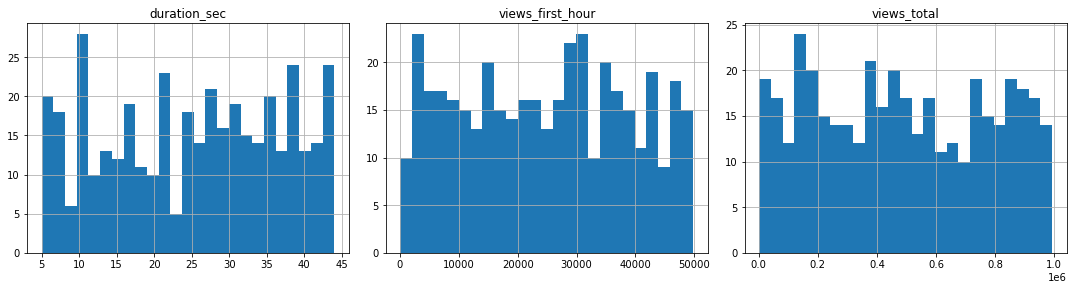

In [9]:
data.select_dtypes(include = 'int64').hist(bins = 25, figsize = (20, 15), layout = (4, 4))
plt.tight_layout()
plt.show()

Video duration, number of views in the first hour and total number of views have similar distribution which look somewhat uniform. Also median and mean values of each metric look almost identical which means there's no outliers.

In [10]:
data.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


In [11]:
data['niche'].value_counts(dropna = False).to_frame('count') \
    .assign(percentage = lambda x: (x['count'] / x['count'].sum() * 100).round(2).astype(str) + '%') \
    .style.background_gradient(cmap='Blues', subset=['count'])

,count,percentage
Food,50,12.5%
Tech,48,12.0%
Music,45,11.25%
Gaming,41,10.25%
Fitness,41,10.25%
Education,40,10.0%
Comedy,39,9.75%
Beauty,35,8.75%
Travel,31,7.75%
Motivation,30,7.5%


Distribution of videos across niche looks uniform, no very outstanding niche. 

_Food_ niche has the most uploaded short videos and _Motivation_ niche has the least uploaded short videos.

In [28]:
data['music_type'].value_counts(dropna = False).to_frame('count') \
    .assign(percentage = lambda x: (x['count'] / x['count'].sum() * 100).round(2).astype(str) + '%')

,count,percentage
Original,87,21.75%
Trending,86,21.5%
No Music,78,19.5%
Remix,76,19.0%
Viral Track,73,18.25%


Distribution of videos across music type used in a video also looks uniform, no very outstanding music type.

Most videos use original sound and the least videos use some viral track.

In [89]:
data.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


Let's create a function to calculate total views by categorical variables and create bar plot so we don't need to repeat same code several times

In [16]:
def plot_views_by_category(df, category_col, value_col, color):
    
    '''
    Calculates sum of views by category column and creates a horizontal bar plot
    
    Params:
        df: DataFrame
        category_col: category column to group by
        value_col: column by which we calculate sum and percentage
        color: color for bars
    '''
    
    grouped_df = df.groupby(category_col, as_index = 0) \
        .agg(**{value_col: (value_col, 'sum')}) \
        .assign(percentage = lambda x: (x[value_col] / x[value_col].sum() * 100).round(2).astype(str) + '%') \
        .sort_values(by = value_col, ascending = False)
    
    plt.figure(figsize = (10, max(6, len(grouped_df) * 0.5)))
    
    # colors = ['#ff4757' if i < 3 else '#2ed573' if i < 10 else '#dfe4ea' for i in range(len(groued_df))]
    
    ax = sb.barplot(data = grouped_df, y = category_col, x = value_col, color = color, orient = 'h')
    
    ax.margins(x = 0.25)
    
    for i, (idx, row) in enumerate(grouped_df.iterrows()):
            ax.text(row[value_col] + grouped_df[value_col].max() * 0.01,
                    i,
                    f"{row[value_col]:,.0f} ({row['percentage']})",
                    va = 'center', ha = 'left', fontsize = 10, color = 'black')
        
    ax.set_title(f'Distribution of {value_col} by {category_col}', fontsize = 16, pad = 20)
    ax.set_xlabel(f'Sum of {value_col}')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()
    
    # return groued_df

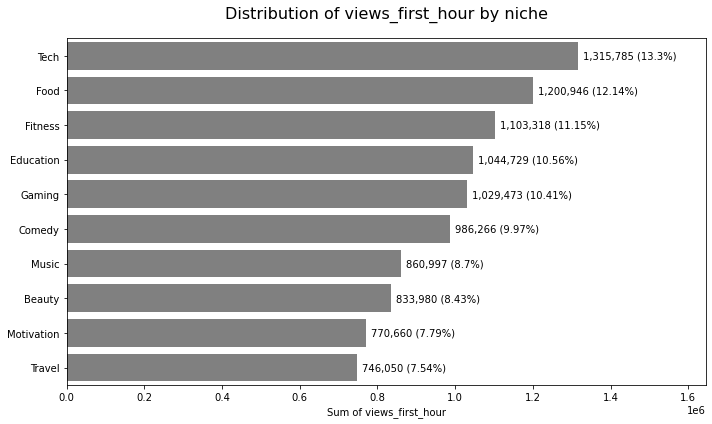

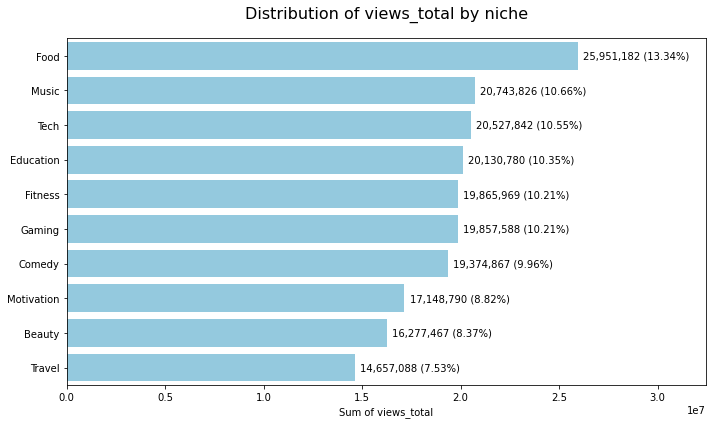

In [17]:
plot_views_by_category(df = data, category_col = 'niche', value_col = 'views_first_hour', color = 'grey')

plot_views_by_category(df = data, category_col = 'niche', value_col = 'views_total', color = 'skyblue')

Top-3 niches by number of views in the 1st hour are

* _Tech_
* _Food_
* _Fitness_

Seems like these niches are watched a lot in the 1st hour. But it also seems like _Food_ is the most popular niche in general and it might be explained by users who rewatch videos from this niche. Second and third niches are _Music_ and _Tech_ which might be also quite popular to rewatch.

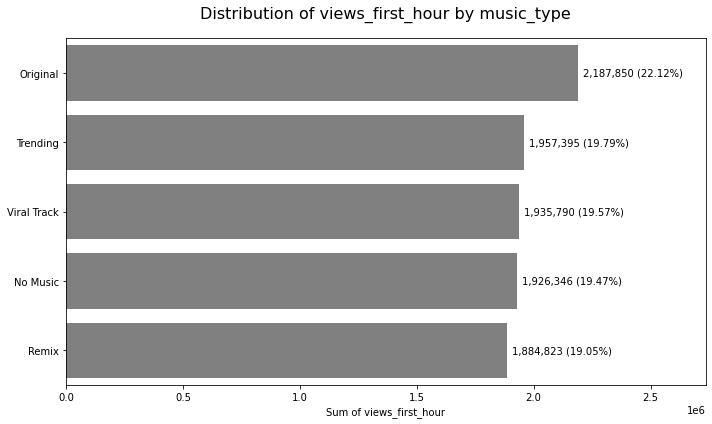

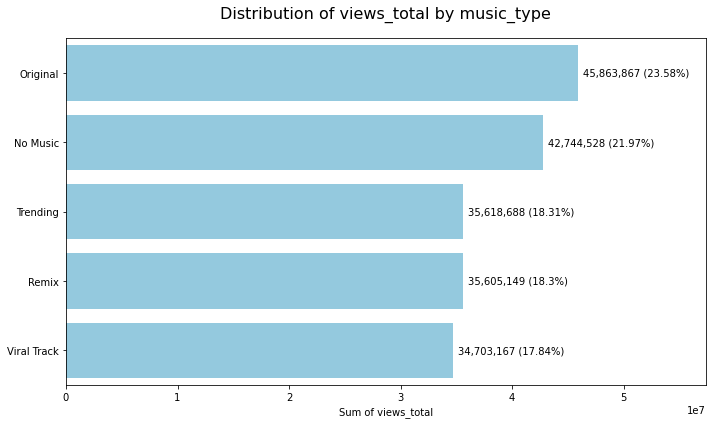

In [18]:
plot_views_by_category(df = data, category_col = 'music_type', value_col = 'views_first_hour', color = 'grey')

plot_views_by_category(df = data, category_col = 'music_type', value_col = 'views_total', color = 'skyblue')

When we look at views by music type we can see that the most popular in the 1st hour and in general are videos with original sound.

In [108]:
data.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


Now let's explore metrics like _hook_strength_score_, _retention_rate_ and _first_3_sec_engagement_ by calculatin average values. To do that we'll create a function that calculcates average values by categorical variables and creates a bar plot

In [19]:
def plot_mean_by_category(df, category_col, value_col):
    
    '''
    Calculates mean of metric by category column and creates a vertical bar plot
    
    Params:
        df: DataFrame
        category_col: category column to group by
        value_col: column by which we calculate the average
    '''
    
    grouped_df = df.groupby(category_col, as_index = 0) \
        .agg(mean_value = (value_col, 'mean')) \
        .sort_values(by = 'mean_value', ascending = False)
    
    plt.figure(figsize = (10, max(6, len(grouped_df) * 0.5)))
    
    # colors = ['#ff4757' if i < 3 else '#2ed573' if i < 10 else '#dfe4ea' for i in range(len(groued_df))]
    
    ax = sb.barplot(data = grouped_df, y = 'mean_value', x = category_col, color = 'salmon')
    
    # ax.margins(x = 0.25)
    
    for i, row in enumerate(grouped_df.itertuples()):
            ax.text(i, row.mean_value + grouped_df['mean_value'].max() * 0.01,
                    f"{row.mean_value:,.2f}",
                    ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'medium')
            
    plt.xticks(rotation = 45, ha = 'right')
        
    ax.set_title(f'Mean of {value_col} by {category_col}', fontsize = 16, pad = 20)
    ax.set_xlabel(f'Mean of {value_col}')
    ax.set_ylabel('')
    ax.grid(axis = 'y', alpha = 0.3, linestyle = '--')
    
    plt.tight_layout()
    plt.show()
    
    # return groued_df

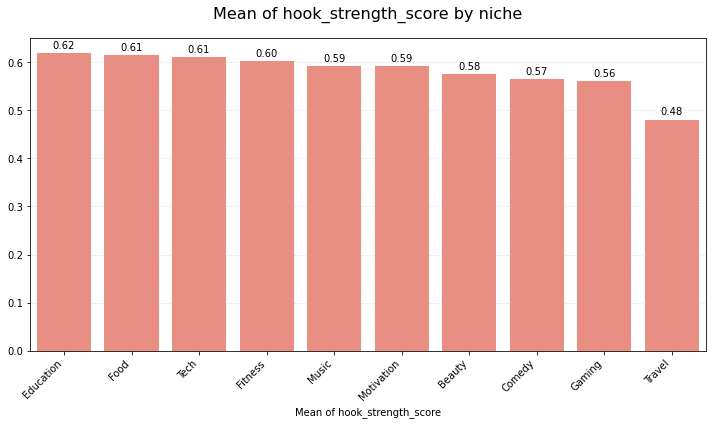

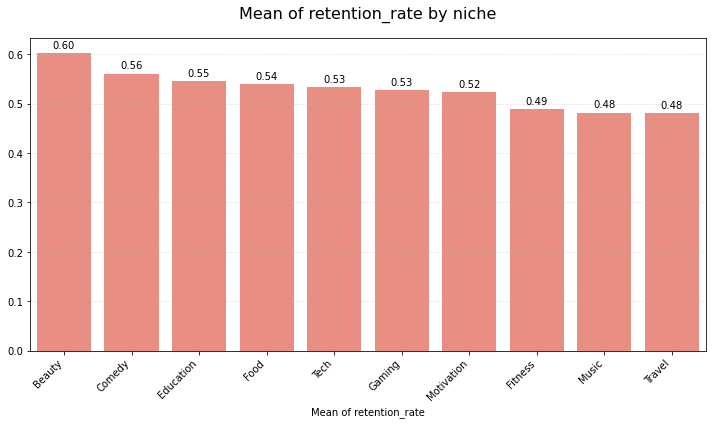

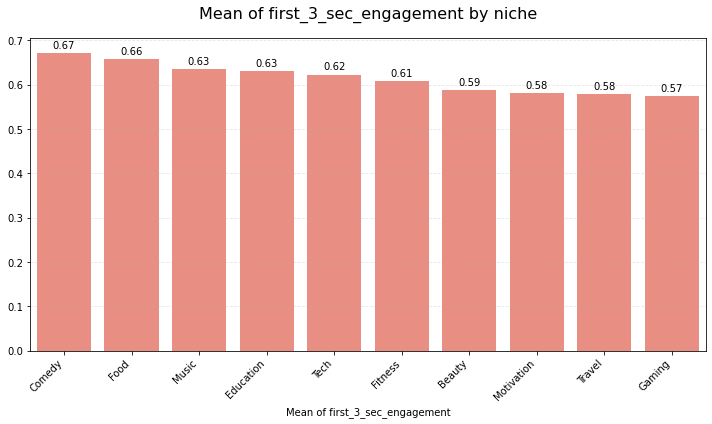

In [20]:
plot_mean_by_category(df = data, category_col = 'niche', value_col = 'hook_strength_score')

plot_mean_by_category(df = data, category_col = 'niche', value_col = 'retention_rate')

plot_mean_by_category(df = data, category_col = 'niche', value_col = 'first_3_sec_engagement')

Niches do not really intersect between each metric:

* Niche with the highest average hook strength is Education
* Niche with the highest average retention rate is Beauty
* Niche with the highest average engagement in 1st 3 secs is Comedy

Maybe it can be explained by the topics covered in each niche.

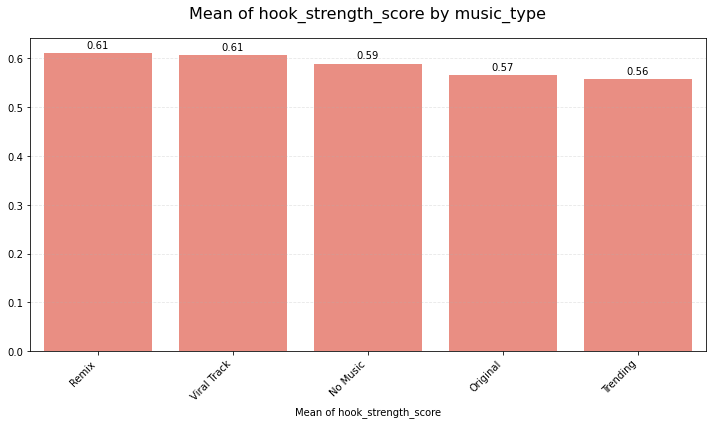

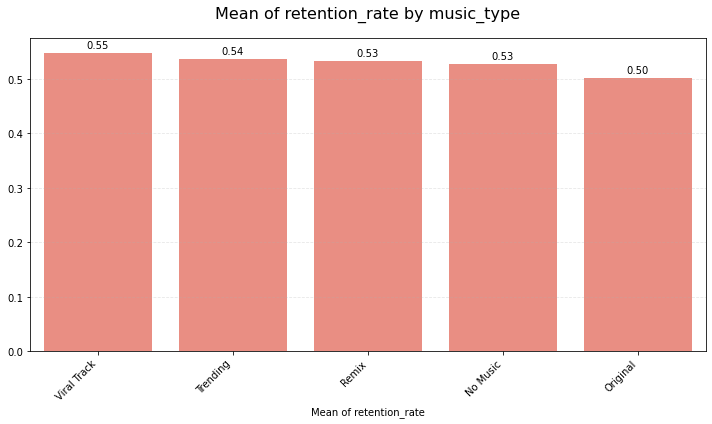

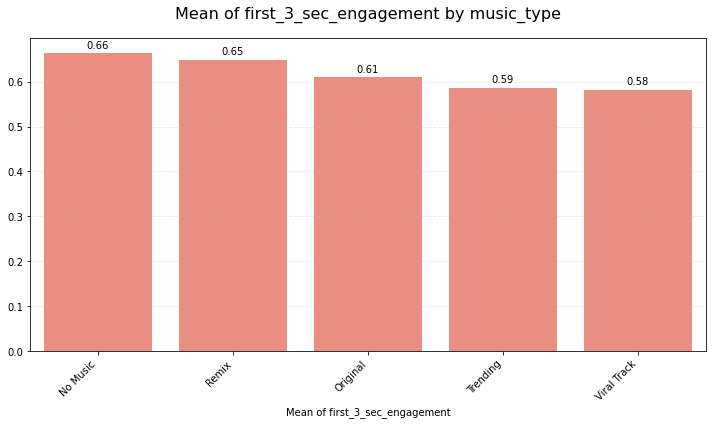

In [112]:
plot_mean_by_category(df = data, category_col = 'music_type', value_col = 'hook_strength_score')

plot_mean_by_category(df = data, category_col = 'music_type', value_col = 'retention_rate')

plot_mean_by_category(df = data, category_col = 'music_type', value_col = 'first_3_sec_engagement')

Music types also do not intersect between each metric.

Let's calucalate correlation matrix for _hook_strength_score_, _retention_rate_ and _first_3_sec_engagement_

In [113]:
data[['hook_strength_score', 'retention_rate', 'first_3_sec_engagement']].corr()

,hook_strength_score,retention_rate,first_3_sec_engagement
hook_strength_score,1.000000,-0.022214,-0.092789
retention_rate,-0.022214,1.000000,0.076217
first_3_sec_engagement,-0.092789,0.076217,1.000000


There's almost no correlation between each metric or in other words there's some negative and postive correlations but very very weak (almost 0).

In [114]:
data.head()

,video_id,duration_sec,hook_strength_score,niche,views_first_hour,views_total,retention_rate,first_3_sec_engagement,music_type,upload_time
0,vid_1,16,0.61,Motivation,10695,886048,0.85,0.26,Viral Track,2024-02-09
1,vid_2,19,0.34,Tech,1812,198243,0.56,0.80,Trending,2024-04-17
2,vid_3,13,0.47,Travel,23247,584171,0.14,0.27,Trending,2024-01-01
3,vid_4,36,0.21,Travel,11515,491291,0.29,0.81,Remix,2024-04-01
4,vid_5,8,0.75,Gaming,13474,607425,0.27,0.44,Viral Track,2024-01-15


In [115]:
data['upload_time'].agg(['min', 'max'])

min    2024-01-01
max    2024-12-30
Name: upload_time, dtype: object

And lastly let's see how number of videos changed over time.

Since we have data for 1 year let's perform calculation on a monthly basis

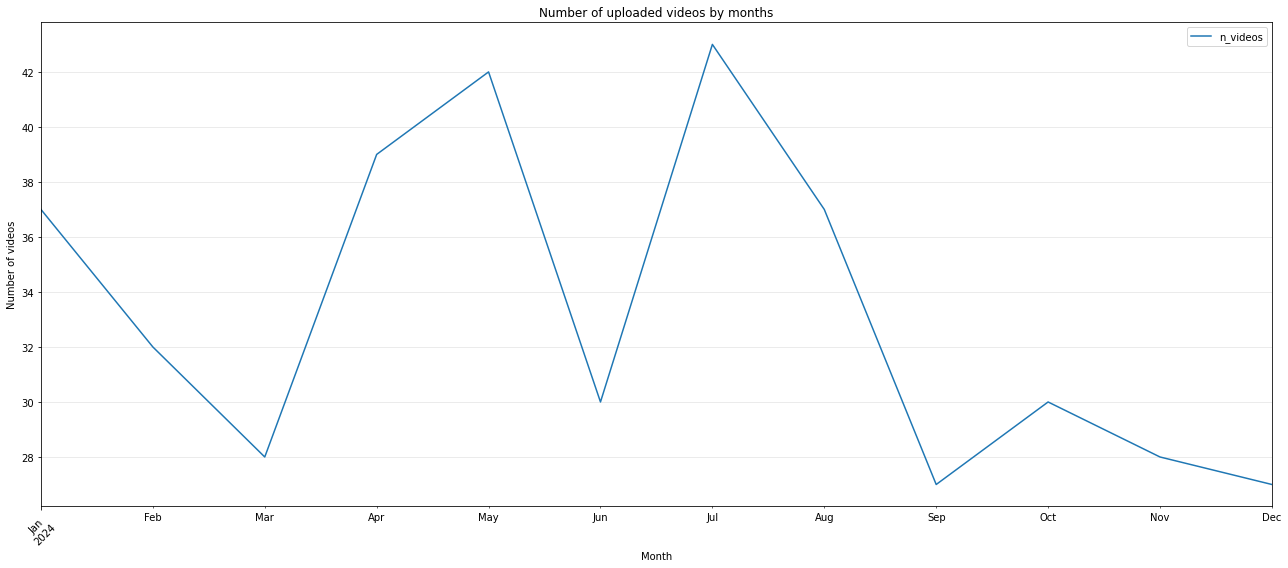

In [125]:
data['upload_month'] = pd.to_datetime(data['upload_time']).dt.to_period('M')

fig, ax = plt.subplots(figsize = (18, 8))

(
    data
    .groupby('upload_month', as_index = 0)
    .agg(n_videos = ('video_id', 'count'))
    .plot(x = 'upload_month', y = 'n_videos', kind = 'line', ax = ax)
)

ax.set_title('Number of uploaded videos by months')
ax.set_xlabel('Month')
ax.set_ylabel('Number of videos')
ax.grid(axis = 'y', alpha = 0.3)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Peaks of video uploadings happend in spring and summer.

## Conlusions

1. Number 1 niche by total number of views is _Food_
2. The most popular music type by total number of views is _Original_ sound
3. Engagement metrics like retention rate, hook strength score and engagement in 1st 3 secs do not correlate with each other
4. Spring and summer is when users upload short videos most